> ## 1. Histogramas

> Usando la función `randn`, generen $N$ valores tipo `Float64` al azar ($N\sim 10000$, o mayor, es razonable). Construyan la función `histograma`, que regresa un vector de tamaño $n_{hist}$ (que es un argumento de la función) y que contiene el histograma de frecuencias *sin normalizar*. Esto es, la primer componente del vector corresponde al número de valores generados al azar que caen en el intervalo (llamado *bin* en inglés) $[x_0, x_1)$, los de la segunda componente caen en el intervalo $[x_1, x_2)$, etc, hasta $[x_{n_{hist}-1}, x{n_{hist}})$, donde el tamaño de los intervalos es el mismo y corresponde a $\Delta x = (\textrm{sup}(x)-\textrm{inf}(x))/n_{hist}$. (No escatimen en estética.)
> 
> Dibujen el histograma a partir de sus datos.
> 
> PyPlot (matplotlib) de hecho tiene [una función]() útil para dibujar histogramas a partir de los datos directamente. Utilizando esa función, muestren el histograma de sus datos. Debería ser muy parecida a la que ya obtuvieron antes.

> NOTA: Hay esencialmente dos formas de hacerlo, que se distinguen por el número de veces que uno lee los datos. Traten de hacer su implementación usando *una* lectura de los datos. (Si no pueden, llevarán sobre sus hombros esa carga toda su vida.)

Definimos la función histograma que ya hace magia de implementar un sólo ciclo.
Calcula el parámetro:
$$ \delta = d_k - b_{min}$$
Si $h$ es el tamaño del bin definido como: 
$$ h = \frac{b_{max} - b_{min}}{N_{bins}} $$
Y $d_k \in H$, siendo $H$ el conjunto de datos a utilizar.
Tendremos entonces, dividiendo por $h$ en la primera expresión:
$$ \frac{\delta}{h} = N_{bins} \left( \frac{d_k - b_{min}}{b_{max} - b_{min}}    \right) $$
Donde hemos asumido que hemos hecho $N_{bins}$ subintervalos regulares $\{ N_j \}$.

Como $\frac{\delta}{h}$ nos dice _cuántos_ subintervalos de longitud $h$ caben en la distancia $\delta$:
$$ \frac{\delta}{h} \approx j$$
Tomando el ___entero mayor más próximo___ (yo hice esto solo por comodidad, por cómo comienza a contar mi función el índice de los histogramas, tomando el límite superior como referencia.) Tendremos: 

$$ j = \lfloor \frac{\delta}{h}     \rfloor $$
$$ j = \lfloor N_{bins} \left( \frac{d_k - b_{min}}{b_{max} - b_{min}}    \right)     \rfloor $$

In [1]:
using PyPlot

In [2]:
"""
```
histograma(data::Array{T<:Real, 1}, N::Int64, graficar::Bool)
``` \n

Calcula el tamaño del bin tomando en cuenta el valor minimo y maximo del arreglo y devuelve un arreglo de `Int64`
con la misma longitud de `N`.

- `data`: Datos de entrada en forma de un arreglo.
- `N`: Numero deseado de bins.
- `graficar`: la posición en True hace que histograma haga la grafica.
"""
function histograma{T<:Real}(data::Array{T, 1}, N::Int64, graficar::Bool=false)
    b_max =maximum(data)
    b_min = minimum(data)
    b_size = (b_max - b_min)/N
    
    Interval = linspace(b_min, b_max, N+1)      # generado para poder graficar.
    c = zeros(Int64, N+1)                       # El arreglo guarda N+1 elementos previniendo que necesitamos 
                                                # un indice extra para generar N subintervalos.
      
    for dat in data                             # el primer elemento es un problema, no se por que.
        δ= (N*(dat - b_min)/(b_max - b_min))    #Sumo este uno por comodidad, los indices comienzan todos en uno.
        index = convert(Int64, floor(δ))+1
        #println(dat, " ",δ, " ", index)
        c[index] += 1
        
        
    end
    
    graficar && bar(Interval, c, b_size, color="hotpink")
    

    return c[1:N-1]                             # yo ingore el ultimo bin para devolver algo de longitud b.
end

histograma (generic function with 2 methods)

Comprobamos que nuestra documentacion funcnione:

In [3]:
? histograma

search: 

```
histograma(data::Array{T<:Real, 1}, N::Int64, graficar::Bool)
```

Calcula el tamaño del bin tomando en cuenta el valor minimo y maximo del arreglo y devuelve un arreglo de `Int64` con la misma longitud de `N`.

  * `data`: Datos de entrada en forma de un arreglo.
  * `N`: Numero deseado de bins.
  * `graficar`: la posición en True hace que histograma haga la grafica.


histograma



Definimos nuestro conjunto de valores aleatorios y nuestro numero de bins... yo voy a poner 100, nada más.

In [4]:
R = randn(100000)   #Este tiene 100 000
N = 100

100

Finalmente probamos...

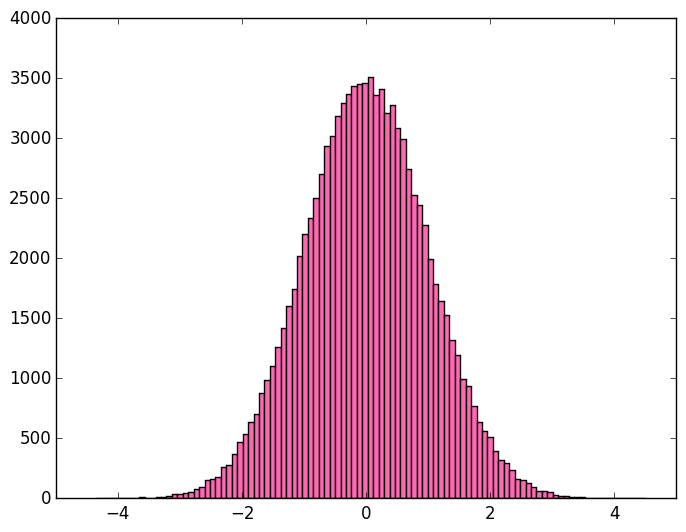

99-element Array{Int64,1}:
  2
  0
  2
  0
  2
  4
  3
  4
  9
  6
  6
 13
 16
  ⋮
 15
 16
  8
  3
  4
  1
  0
  0
  2
  2
  0
  0

In [5]:
H = histograma(R,N, true)

Lo intentamos ahora con la funcion de pyplot, que está bien rara.

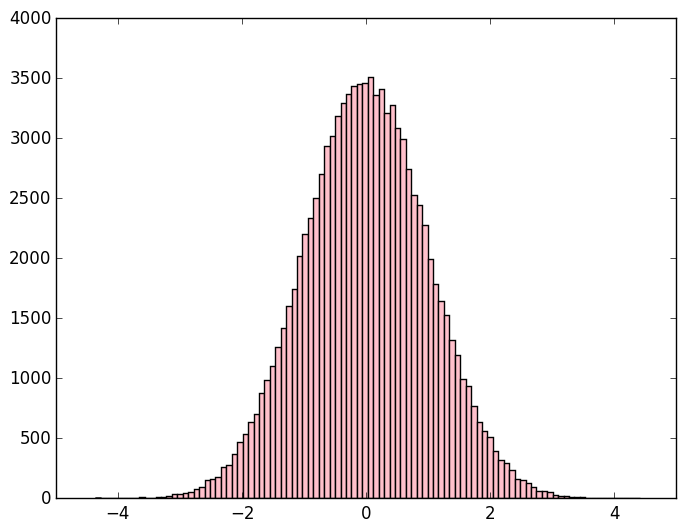

([2.0,0.0,2.0,0.0,2.0,4.0,3.0,4.0,9.0,6.0  …  3.0,4.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0],[-4.36097,-4.27322,-4.18548,-4.09774,-4.00999,-3.92225,-3.83451,-3.74676,-3.65902,-3.57128  …  3.62367,3.71141,3.79915,3.88689,3.97464,4.06238,4.15012,4.23787,4.32561,4.41335],Any[PyObject <matplotlib.patches.Rectangle object at 0x31efc36d0>,PyObject <matplotlib.patches.Rectangle object at 0x31efc3dd0>,PyObject <matplotlib.patches.Rectangle object at 0x31efc9990>,PyObject <matplotlib.patches.Rectangle object at 0x31efcc350>,PyObject <matplotlib.patches.Rectangle object at 0x31efccd10>,PyObject <matplotlib.patches.Rectangle object at 0x31f593690>,PyObject <matplotlib.patches.Rectangle object at 0x31f593e50>,PyObject <matplotlib.patches.Rectangle object at 0x31f598a10>,PyObject <matplotlib.patches.Rectangle object at 0x31f59e390>,PyObject <matplotlib.patches.Rectangle object at 0x31f59ed50>  …  PyObject <matplotlib.patches.Rectangle object at 0x31f67b490>,PyObject <matplotlib.patches.Rectangle object a

In [6]:
p = plt[:hist](R, N, color="pink") #No se que es toda esa basura en la salida.

Por curiosidad podemos ejecutar el macro `@time`para ver que onda con ambas funciones:




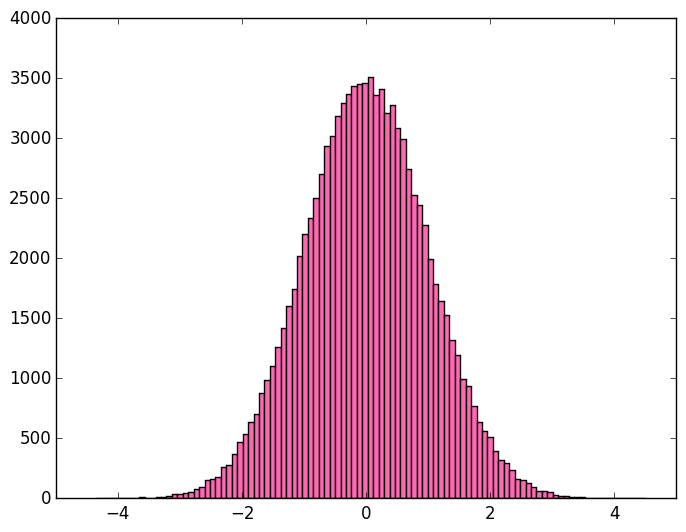

99-element Array{Int64,1}:
  2
  0
  2
  0
  2
  4
  3
  4
  9
  6
  6
 13
 16
  ⋮
 15
 16
  8
  3
  4
  1
  0
  0
  2
  2
  0
  0

0.134698 seconds (1.47 k allocations: 47.261 KB)


In [7]:
@time histograma(R,N, true)

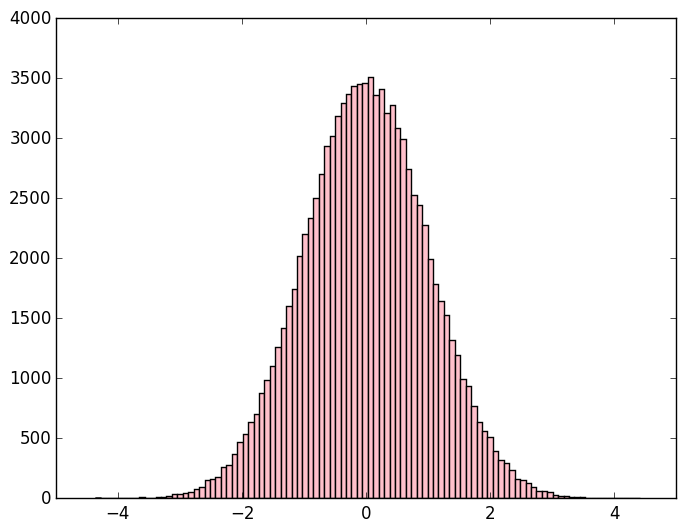

([2.0,0.0,2.0,0.0,2.0,4.0,3.0,4.0,9.0,6.0  …  3.0,4.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0],[-4.36097,-4.27322,-4.18548,-4.09774,-4.00999,-3.92225,-3.83451,-3.74676,-3.65902,-3.57128  …  3.62367,3.71141,3.79915,3.88689,3.97464,4.06238,4.15012,4.23787,4.32561,4.41335],Any[PyObject <matplotlib.patches.Rectangle object at 0x31fdf0350>,PyObject <matplotlib.patches.Rectangle object at 0x31fdf0c90>,PyObject <matplotlib.patches.Rectangle object at 0x31fdf7610>,PyObject <matplotlib.patches.Rectangle object at 0x31fdf7fd0>,PyObject <matplotlib.patches.Rectangle object at 0x31fdfd950>,PyObject <matplotlib.patches.Rectangle object at 0x31fe03310>,PyObject <matplotlib.patches.Rectangle object at 0x31fe03cd0>,PyObject <matplotlib.patches.Rectangle object at 0x31fe07650>,PyObject <matplotlib.patches.Rectangle object at 0x31fe07dd0>,PyObject <matplotlib.patches.Rectangle object at 0x31fe0d990>  …  PyObject <matplotlib.patches.Rectangle object at 0x31ff22e50>,PyObject <matplotlib.patches.Rectangle object a

0.131998 seconds (816 allocations: 20.922 KB)


In [8]:
@time plt[:hist](R, N, color="pink")


Y bueno, para nuestra función da `0.136718 seconds (1.33 k allocations: 37.266 KB)` y para la de pyplot `0.132239 seconds (816 allocations: 20.922 KB)`. Vemos que ahí se andan dando.

>## 2. Promedio y varianza

>(a) Siguiendo con la generación de datos del ejercicio anterior, hagan una subrutina que calcule el promedio y la varianza de los datos generados anteriormente. Comparen su resultado con lo que se obtiene al utilizar `mean` y `var` (que son las funciones nativas de julia que hacen eso).
    
>(b) Existe un [algoritmo recursivo](https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance#Online_algorithm), ampliamente desconocido, que permite calcular el promedio y la varianza con una sóla lectura de los datos. Impleméntenlo. La *misma* función debería de darles *ambos* valores.
    
>(c) ¿Cuál de todos los algoritmos es el más rápido? Consideren esto para datos de distinta longitud, cubriendo varios órdenes de magnitud.

### (A) 
construimos las dos funciones que necesitamos.

In [9]:
function promedio(data)
    n = length(data)
    p = 0.0
    
    for dat in data
        p += dat
    end
    return p/n
end

function varianza_a(data)
    n = length(data)
    s = 0.0
    P = promedio(data)
    
    for dat in data
        s += (dat - P)^2
    end
    return (s /(n-1))
end
    

varianza_a (generic function with 1 method)

Las probamos:

In [10]:
Prueba = rand(10)

10-element Array{Float64,1}:
 0.380989  
 0.780772  
 0.750345  
 0.856408  
 0.309983  
 0.300069  
 0.384364  
 0.99901   
 0.464991  
 0.00720696

In [11]:
prom = promedio(Prueba)

0.5234137383599766

In [12]:
vari = varianza_a(Prueba)

0.09552742993182814

Veamos que dan las funciones internas:

In [13]:
prom == mean(Prueba)

true

In [14]:
vari == var(Prueba)

true

Vaya! da lo mismo...

### (B)

Buscando por ahí, hallé una entrada de Wikipedia que podía servir. La dejo aquí [Aquí](https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance "Wikipedia: algoritmos para la varianza").

Llaman al método *Online Method*, citando el libro de Donald E. Knuth, _The Art of Computer Programming_ , de 1998.

In [15]:
"""
Recibe un arreglo y devuelve una tupla:
```
(varianza, promedio)

```

"""
function varianza_b(data)
    n = 0
    promedio = 0.0
    M2 = 0.0
    
    for x in data                   #solo hacemos un ciclo y es recursivo!
        n += 1
        delta = x - promedio
        promedio += delta/n
        M2 += delta*(x - promedio)
        #println(M2 / (n - 1), " ", promedio)
    end
    
    if (n < 2)                     #verificamos que almenos haya dos datos... si eso no pasa... tendremos problemas.
        return (NaN, promedio)     #no corto con un error porque el promedio no tiene broncas aqui
    else
        return ((M2 / (n - 1)), promedio)
    end
    
end
    
    

varianza_b (generic function with 1 method)

Ahora vamos a probar con algunos conjuntos de diferentes órdenes de magnitud:

In [19]:
Grande = randn(1000)
MuyGrande = randn(10000)
SuperGrande = randn(100000)
Inmenso = randn(1000000)

1000000-element Array{Float64,1}:
  1.75716  
  1.39127  
  0.190933 
  0.533354 
 -0.952193 
  1.83314  
 -0.253076 
  1.13761  
  0.0794612
  1.46602  
 -0.0371629
  0.506018 
 -0.927742 
  ⋮        
  1.02084  
  0.548091 
 -0.989412 
  2.12924  
 -0.742463 
 -0.0535275
  0.407328 
  1.28466  
  0.343304 
 -0.639048 
 -0.209275 
  1.17788  

In [20]:
v1 = varianza_b(Grande)
v2 = varianza_b(MuyGrande)
v3 = varianza_b(SuperGrande)
v4 = varianza_b(Inmenso)

(0.9993486413117161,-2.5672170605741635e-5)

Y checamos qué onda con los errores relativos de los valores que calcula nuestra función con los que da la máquina.

In [21]:
println("Error varianza_b vs. La maquina de Grande     = ", abs(v1[1] - var(Grande)))
println("Error varianza_b vs. La maquina de MuyGrande  = ", abs(v2[1] - var(MuyGrande)))
println("Error varianza_b vs. La maquina de SuperGrande= ", abs(v3[1] - var(SuperGrande)))
println("Error varianza_b vs. La maquina de Inmenso    = ", abs(v4[1] - var(Inmenso)))

Error varianza_b vs. La maquina de Grande     = 1.1102230246251565e-15
Error varianza_b vs. La maquina de MuyGrande  = 1.9984014443252818e-15
Error varianza_b vs. La maquina de SuperGrande= 4.107825191113079e-15
Error varianza_b vs. La maquina de Inmenso    = 2.653433028854124e-14


Parece que pasa algo interesante... veamos con atención:

In [22]:
X = Float64[]
Pr = Float64[]
Vr = Float64[]
for i in 1:8
    e = 10^i
    n = convert(Int64, e)
    R = rand(n)
    V = var(R)
    P = mean(R)
    v = varianza_b(R)
    push!(X, e)
    E1 = abs(v[1] - V)
    E2 = abs(v[2] - V)
    push!(Vr, E1)
    push!(Pr, E2)
    
end

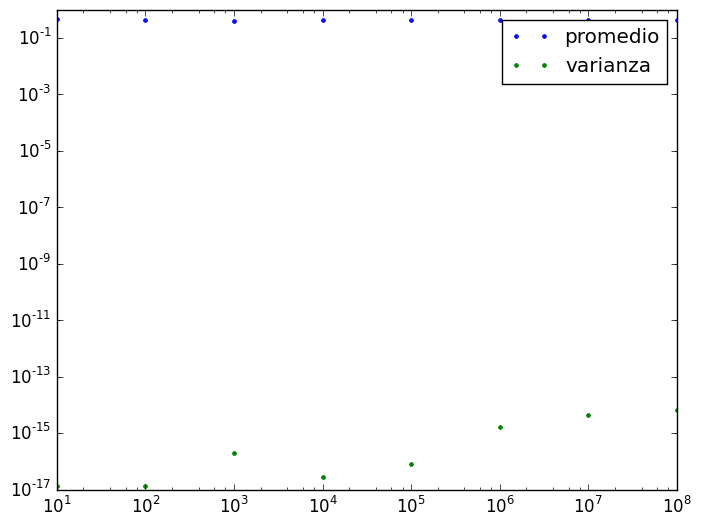

PyObject <matplotlib.legend.Legend object at 0x3560e59d0>

In [23]:
loglog(X, Pr, ".", label="promedio")
loglog(X, Vr, ".", label="varianza")
legend()




Al parecer, según crece el orden de magnitud de la muestra, el cálculo de la varianza hecho por 'varianza_b' se aleja del obtenido por la funcinón interna. Pero si comparamos el tiempo con `varianza_a`:

___

In [24]:
println(@time varianza_a(Grande), " <--- (A) vs. (B) --->", @time varianza_b(Grande)[1])

  0.000012 seconds (6 allocations: 208 bytes)
  0.000346 seconds (364 allocations: 16.625 KB)
(0.9617477543458977," <--- (A) vs. (B) --->",0.961747754345897)


In [25]:
println(@time varianza_a(MuyGrande), " <--- (A) vs. (B) --->", @time varianza_b(MuyGrande)[1])

  0.000100 seconds (6 allocations: 208 bytes)
  0.000511 seconds (358 allocations: 16.031 KB)
(1.0154324358483033," <--- (A) vs. (B) --->",1.0154324358483005)


In [26]:
println(@time varianza_a(SuperGrande), " <--- (A) vs. (B) --->", @time varianza_b(SuperGrande)[1])

  0.000904 seconds (6 allocations: 208 bytes)
  0.001459 seconds (352 allocations: 15.813 KB)
(0.9976388578845627," <--- (A) vs. (B) --->",0.9976388578845636)


In [27]:
println(@time varianza_a(Inmenso), " <--- (A) vs. (B) --->", @time varianza_b(Inmenso)[1])

  0.009073 seconds (6 allocations: 208 bytes)
  0.011845 seconds (356 allocations: 16.250 KB)
(0.9993486413116319," <--- (A) vs. (B) --->",0.9993486413117161)


___
Vaya... el calculo de la funcion `varianza_b` es considerablemente más lento...
En un principio consideré estar haciendo algo mal... pero los valores entre ambos son bastante congruentes.
Nos quedamos _definitivamente_ con la función __varianza_a__. Quizá tuvimos que hacer dos pasos, pero funcionó.


Yo usé la __Regla de Simpson Compuesta__ y la tomé de [aquí](https://es.wikipedia.org/wiki/Regla_de_Simpson#Regla_de_Simpson_compuesta "si... Wikipedia").
Propuse una función muy fácil, la constante:
$$f(x) = 3$$
Y la integré en el intervalo $[0,1]$.

Sabemos cuánto da esto:
$$\int_0^1 f(x) dx = \int_0^1 3 dx = 3  $$
Implementamos:

In [28]:
function f1(x)
    y = 3
    return y
end

f1 (generic function with 1 method)

In [29]:
"""
Regla de simpson Compuesta. 
Recibe los limites de integracion y la cantidad de pasos deseados.
"""
function simpson_de_f{T<:Real}(f, a::T,b::T,n::Int64)
    (n%2)!= 0 && error("Recibido n = ",n, ". Introduce un n par, porfavor") #solo funciona para n par.
    h = (b - a)/n
    x = collect(a:h:b)
    
    index = convert(Int64, n/2)
    #println("index: ", index)
    s_par = 0.0
    s_impar = 0.0
    
    for i in 1:index-1
        s_par += f(x[2*i])
        s_impar += f(x[(2*i)-1])
    end
    s_impar += f(x[n-1])
    simpson = (h/3)*(f(a) + 2*s_par + 4*s_impar + f(b))
        
    
    #println("Funciona.") 
        
    
    
    return simpson
    
    
    
end

simpson_de_f (generic function with 1 method)

Llegada la onda de la verdad...

In [30]:
pasos = 1000
Integral = simpson_de_f(f1, 0.0,1.0,10000)

3.0

¡Vaya!... sí da lo que queremos... algo un poco más complicado.

$$\int_0^1 2x dx = x^2 | _0 ^1 = 1$$

In [31]:
function f2(x)
    y = 2*x
    return y
end

f2 (generic function with 1 method)

In [32]:
simpson_de_f(f2, 0.0,1.0, pasos)

0.9980013333333334

Rayos... no nos aproximamos tan bien como nos hubiera gustado... ¿Mas pasos?


In [33]:
simpson_de_f(f2, 0.0,1.0, 10000000)

0.9999998000000144

Casi... pero igual no.